In [1]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
from collections import defaultdict
import scipy.stats as st
import pickle

import seaborn as sns

import networkx as nx
# import gmatch4py as gm

import sys
sys.path.append("..\\Git\\complex_stylized_supply_chain_model_generator")

from complex_toy_model_graph_generator import ComplexSimModelGraph
from structure_model_composer.set_locations_of_structures import plot_graph_locations_with_pos


In [2]:
data={}
x={}
y={}

In [3]:
#Open data
all_techniques = ["powell", "abc", "bo", "ga"]
for tech in all_techniques:
    with open(f"./{tech}_noise/final_{tech}_noise_all_seeds.pkl", "rb") as f:
        data_load = pickle.load(f)
        if len(data) == 0:
            data = data_load
        else:
            for key in data.keys():
                data[key].update(data_load[key])

    for seed, dict_seed in data_load.items():
        for perc, res in dict_seed.items():
            method_name = perc.split("_")[0]
            try:
                percentage = x[method_name]
                performance = y[method_name]
            except KeyError:
                percentage = x[method_name] = []
                performance = y[method_name] = defaultdict(list)
            current_percentage = int(perc.split("_")[-1])
            percentage.append(current_percentage)
            if tech == "abc":
                performance[current_percentage].append(res["Quality_of_Fit_Frequency"]["graph_edit_distance"])
            else:
                performance[current_percentage].append(res["Quality_of_Fit"]["graph_edit_distance"])

# Graph Edit Distance

In [4]:
# For Seaborn plots
df = pd.DataFrame(y).reset_index().rename(columns={"index":"percentage"})

# Initialize an empty list to store the rows of the new DataFrame
new_rows = []

# Iterate over each row of the original DataFrame
for index, row in df.iterrows():
    percentage = row['percentage']  # Extract percentage from the row
    for technique, values in row.items():
        if technique != 'percentage':
            seed = 1
            for value in values:
                new_rows.append({'percentage of sparseness': percentage, 'technique': technique, 'graph edit distance': value, "seed":seed})
                seed+=1
# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)

In [5]:
# for all results
df_results_all = new_df.copy()

In [6]:
df_results_all[df_results_all["technique"] == "ga"]

,percentage of sparseness,technique,graph edit distance,seed
18,0,ga,0.671687,1
19,0,ga,0.679675,2
20,0,ga,0.676737,3
21,0,ga,0.843137,4
22,0,ga,0.760618,5
23,0,ga,0.625698,6
42,10,ga,0.671687,1
43,10,ga,0.764151,2
44,10,ga,0.827586,3
45,10,ga,0.000000,4


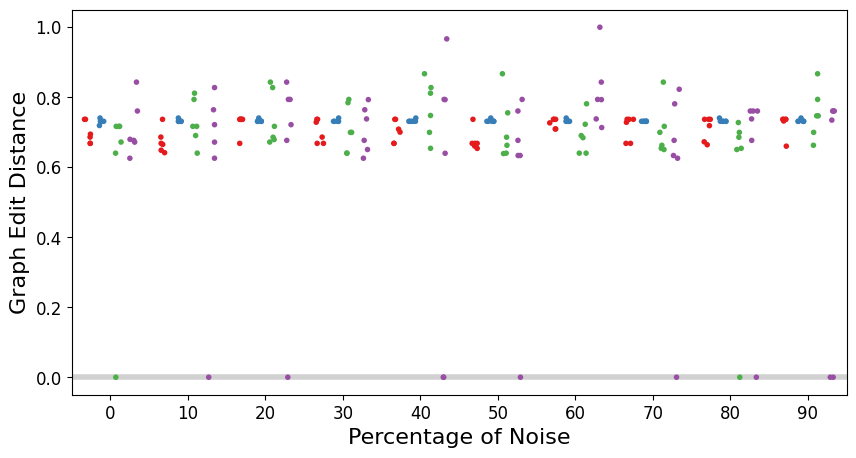

In [13]:
plt.figure(figsize=(10,5))
plt.axhline(y=0, color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

sns.stripplot(data=new_df, x="percentage of sparseness", y="graph edit distance", hue="technique",
             size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Percentage of Noise", fontsize = 16)
plt.ylabel("Graph Edit Distance", fontsize = 16)
plt.ylim((-.05,1.05))
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig("./images/noise_ged", bbox_inches='tight')
plt.show()

# Absolute Graph Edit Distance

In [14]:
sol={}
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            solution = sol[method_name]
        except KeyError:
            solution = sol[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        if method_name == "abc":
            solution[current_percentage].append(res["Quality_of_Fit_Frequency"]["abs_dist"])
        else:
            solution[current_percentage].append(res["Quality_of_Fit"]["abs_dist"])

In [15]:
# For Seaborn plots
df = pd.DataFrame(sol).reset_index().rename(columns={"index":"percentage"})

# Initialize an empty list to store the rows of the new DataFrame
new_rows = []

# Iterate over each row of the original DataFrame
for index, row in df.iterrows():
    percentage = row['percentage']  # Extract percentage from the row
    for technique, values in row.items():
        if technique != 'percentage':
            seed = 1
            for value in values:
                new_rows.append({'percentage of sparseness': percentage, 'technique': technique, 'abs_ged': value, "seed":seed})
                seed+=1
# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)

In [16]:
new_df[new_df["technique"] == "ga"]

,percentage of sparseness,technique,abs_ged,seed
18,0,ga,456.0,1
19,0,ga,282.0,2
20,0,ga,555.0,3
21,0,ga,555.0,4
22,0,ga,582.0,5
23,0,ga,1033.0,6
42,10,ga,582.0,1
43,10,ga,0.0,2
44,10,ga,555.0,3
45,10,ga,371.0,4


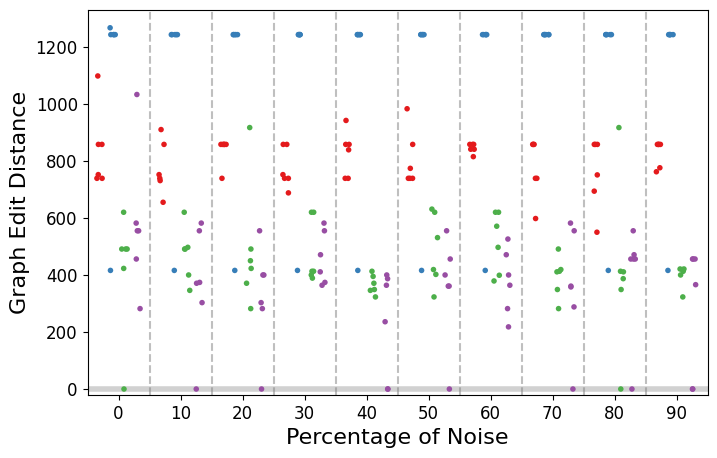

In [31]:
plt.figure(figsize=(8,5))
plt.axhline(y=0, color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

sns.stripplot(data=new_df, x="percentage of sparseness", y="abs_ged", hue="technique",
             size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)

# Get the positions of the x-ticks
xticks = plt.gca().get_xticks()

# Add vertical lines between the x-ticks
for tick in xticks[:-1]:  # Exclude the last tick
    plt.axvline(x=tick + 0.5, color="gray", linestyle="--", alpha=0.5)  # Adjust the position as needed

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Percentage of Noise", fontsize = 16)
plt.ylabel("Graph Edit Distance", fontsize = 16)
plt.ylim((-20))
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("./images/noise_ged_abs", bbox_inches='tight')
plt.show()

# Ranking of Average Betweenness Centrality

In [32]:
sol={}
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            solution = sol[method_name]
        except KeyError:
            solution = sol[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        if method_name == "abc":
            solution[current_percentage].append(int(round(res["Quality_of_Fit_Frequency"]["stats"]["optimal_mode"])))
        elif method_name == "ga":
            solution[current_percentage].append(int(round(res["Results"][0]["graph_structure"])))
        else:
            solution[current_percentage].append(int(round(res["Results"]["graph_structure"][0])))

In [33]:
# For Seaborn plots
df = pd.DataFrame(sol).reset_index().rename(columns={"index":"percentage"})

# Initialize an empty list to store the rows of the new DataFrame
new_rows = []

# Iterate over each row of the original DataFrame
for index, row in df.iterrows():
    percentage = row['percentage']  # Extract percentage from the row
    for technique, values in row.items():
        if technique != 'percentage':
            seed = 1
            for value in values:
                new_rows.append({'percentage of sparseness': percentage, 'technique': technique, 'graph index': value, "seed":seed})
                seed+=1
# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)

In [34]:
#for all results
df_results_all["ranking betweenness"] = new_df["graph index"]

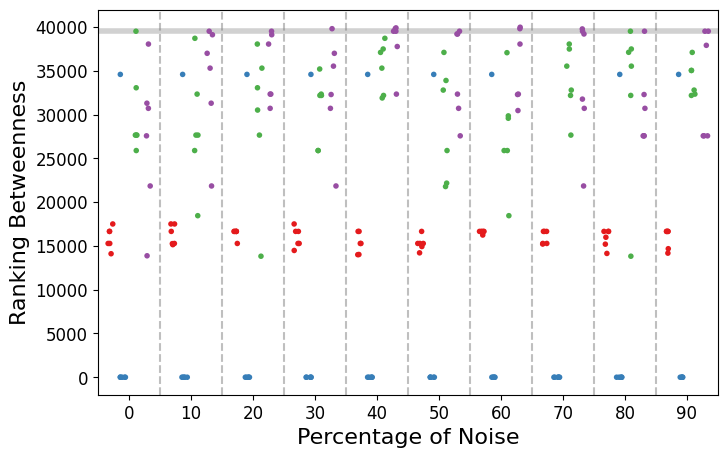

In [35]:
plt.figure(figsize=(8,5))
plt.axhline(y=39520, color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

sns.stripplot(data=new_df, x="percentage of sparseness", y="graph index", hue="technique",
             size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)

# Get the positions of the x-ticks
xticks = plt.gca().get_xticks()

# Add vertical lines between the x-ticks
for tick in xticks[:-1]:  # Exclude the last tick
    plt.axvline(x=tick + 0.5, color="gray", linestyle="--", alpha=0.5)  # Adjust the position as needed

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Percentage of Noise", fontsize = 16)
plt.ylabel("Ranking Betweenness", fontsize = 16)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("./images/noise_ranking",bbox_inches='tight')
plt.show()

# Manhattan Value

In [36]:
sol_obj={}
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            solution = sol_obj[method_name]
        except KeyError:
            solution = sol_obj[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        if method_name == "abc":
            solution[current_percentage].append(float(res["Quality_of_Fit_Frequency"]["stats"]["Distance"]))
        elif method_name == "ga":
            solution[current_percentage].append(res["Results"][0]["min_distance"])
        elif method_name == "powell":
            solution[current_percentage].append(int(round(res["Results"]["Distance"][0])))
        else:
            solution[current_percentage].append(float(res["Results"]["min_distance"][0]))
            # solution[current_percentage].append(int(round(res["Results"]["Distance"][0])))

In [37]:
# For Seaborn plots
df = pd.DataFrame(sol_obj).reset_index().rename(columns={"index":"percentage"})

# Initialize an empty list to store the rows of the new DataFrame
new_rows = []

# Iterate over each row of the original DataFrame
for index, row in df.iterrows():
    percentage = row['percentage']  # Extract percentage from the row
    for technique, values in row.items():
        if technique != 'percentage':
            seed = 1
            for value in values:
                new_rows.append({'percentage of sparseness': percentage, 'technique': technique, 'manhattan': value, "seed":seed})
                seed+=1
# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)

In [38]:
#for all results
df_results_all["manhattan distance"] = new_df["manhattan"]

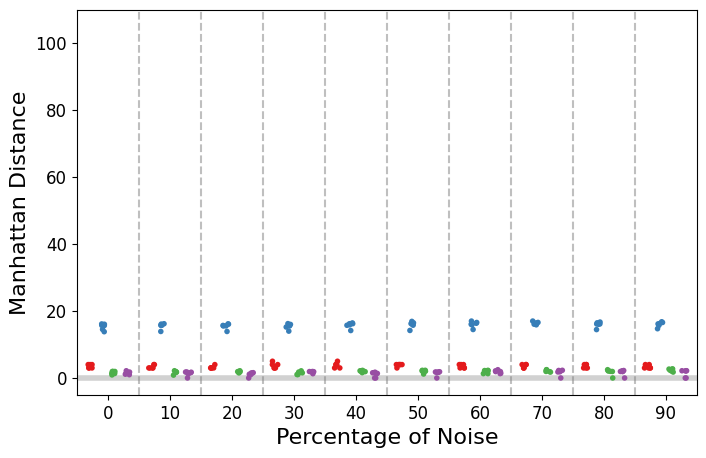

In [39]:
plt.figure(figsize=(8,5))
plt.axhline(y=0, color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

sns.stripplot(data=new_df, x="percentage of sparseness", y="manhattan", hue="technique",
             size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)

# Get the positions of the x-ticks
xticks = plt.gca().get_xticks()

# Add vertical lines between the x-ticks
for tick in xticks[:-1]:  # Exclude the last tick
    plt.axvline(x=tick + 0.5, color="gray", linestyle="--", alpha=0.5)  # Adjust the position as needed

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Percentage of Noise", fontsize = 16)
plt.ylabel("Manhattan Distance", fontsize = 16)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-5, 110)

plt.savefig("./images/noise_manhattan", bbox_inches='tight')
plt.show()

# Features

In [40]:
ground_truth_features = data[1]["powell_0"]["Quality_of_Fit"]["features"].loc["ground_truth"].to_dict()

In [41]:
def plot_features(FEATURE):
    feature = FEATURE
    sol_feature={}
    for seed, dict_seed in data.items():
        for perc, res in dict_seed.items():
            method_name = perc.split("_")[0]
            try:
                solution = sol_feature[method_name]
            except KeyError:
                solution = sol_feature[method_name] = defaultdict(list)
            current_percentage = int(perc.split("_")[-1])
            if method_name == "abc":
                solution[current_percentage].append(int(res["Quality_of_Fit_Frequency"]["features"][feature]["solution"]))
            else:
                solution[current_percentage].append(int(res["Quality_of_Fit"]["features"][feature]["solution"]))

    
    # For Seaborn plots
    df = pd.DataFrame(sol_feature).reset_index().rename(columns={"index":"percentage"})
    
    # Initialize an empty list to store the rows of the new DataFrame
    new_rows = []
    
    # Iterate over each row of the original DataFrame
    for index, row in df.iterrows():
        percentage = row['percentage']  # Extract percentage from the row
        for technique, values in row.items():
            if technique != 'percentage':
                seed = 1
                for value in values:
                    new_rows.append({'percentage of sparseness': percentage, 'technique': technique, feature: value, "seed":seed})
                    seed+=1
    # Create a new DataFrame from the list of rows
    new_df = pd.DataFrame(new_rows)

    # for all results
    df_results_all[feature] = new_df[feature]

    plt.figure(figsize=(8,5))
    plt.axhline(y=ground_truth_features[feature], color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

    sns.stripplot(data=new_df, x="percentage of sparseness", y=feature, hue="technique",
                              size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)
    # Get the positions of the x-ticks
    xticks = plt.gca().get_xticks()
    
    # Add vertical lines between the x-ticks
    for tick in xticks[:-1]:  # Exclude the last tick
        plt.axvline(x=tick + 0.5, color="gray", linestyle="--", alpha=0.5)  # Adjust the position as needed

    if feature == "nodes":
        feature = "vertices"
    
    #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel("Percentage of Noise", fontsize = 16)
    plt.ylabel(str("# " ) + feature.title(), fontsize = 16)
    plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.savefig(f"./images/noise_{feature}")
    plt.show()

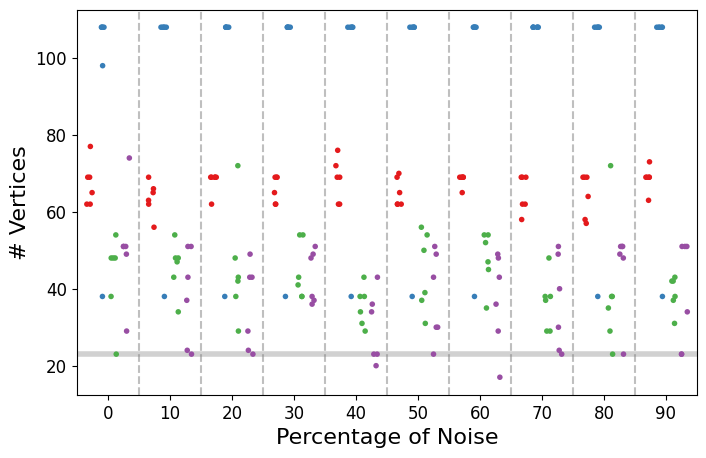

In [42]:
plot_features("nodes")

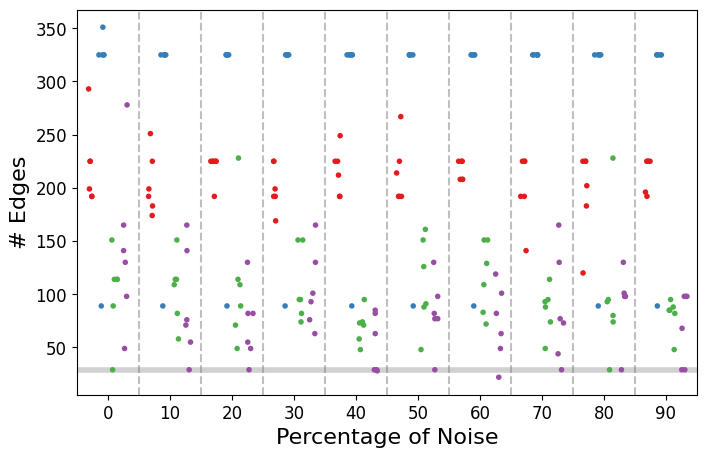

In [43]:
plot_features("edges")

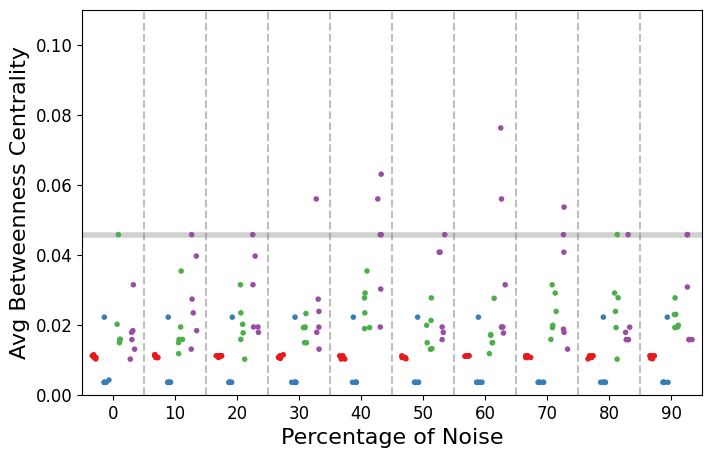

In [44]:
feature = "betweenness"
sol_feature={}
for seed, dict_seed in data.items():
    for perc, res in dict_seed.items():
        method_name = perc.split("_")[0]
        try:
            solution = sol_feature[method_name]
        except KeyError:
            solution = sol_feature[method_name] = defaultdict(list)
        current_percentage = int(perc.split("_")[-1])
        if method_name == "abc":
            solution[current_percentage].append(float(res["Quality_of_Fit_Frequency"]["features"][feature]["solution"]))
        else:
            solution[current_percentage].append(float(res["Quality_of_Fit"]["features"][feature]["solution"]))


# For Seaborn plots
df = pd.DataFrame(sol_feature).reset_index().rename(columns={"index":"percentage"})

# Initialize an empty list to store the rows of the new DataFrame
new_rows = []

# Iterate over each row of the original DataFrame
for index, row in df.iterrows():
    percentage = row['percentage']  # Extract percentage from the row
    for technique, values in row.items():
        if technique != 'percentage':
            seed = 1
            for value in values:
                new_rows.append({'percentage of sparseness': percentage, 'technique': technique, feature: value, "seed":seed})
                seed+=1
# Create a new DataFrame from the list of rows
new_df = pd.DataFrame(new_rows)

# for all results
df_results_all["avg betweenness centrality"] = new_df[feature]

plt.figure(figsize=(8,5))
plt.axhline(y=ground_truth_features[feature], color="dimgrey", label="ground truth", linestyle="-", alpha=0.3, linewidth=4)

sns.stripplot(data=new_df, x="percentage of sparseness", y=feature, hue="technique",
                              size=4, jitter=0.2, palette="Set1", alpha=1, legend=False, dodge=True)

# Get the positions of the x-ticks
xticks = plt.gca().get_xticks()

# Add vertical lines between the x-ticks
for tick in xticks[:-1]:  # Exclude the last tick
    plt.axvline(x=tick + 0.5, color="gray", linestyle="--", alpha=0.5)  # Adjust the position as needed

#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Percentage of Noise", fontsize = 16)
plt.ylabel("Avg Betweenness Centrality"  , fontsize = 16)
plt.xticks([0,1,2,3,4,5,6,7,8,9], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 0.11)

plt.savefig("./images/noise_betweenness", bbox_inches='tight')
plt.show()

# Pairs plot

In [17]:
df_pairs = df_results_all[["technique", "graph edit distance", "ranking betweenness", "avg betweenness centrality", "nodes", "edges", "manhattan distance"]].rename(columns={"nodes": "# vertices",
                                                                                                                                                     "edges": "# edges"})

C:\Users\IvS\anaconda3\envs\calibration_1_py9\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


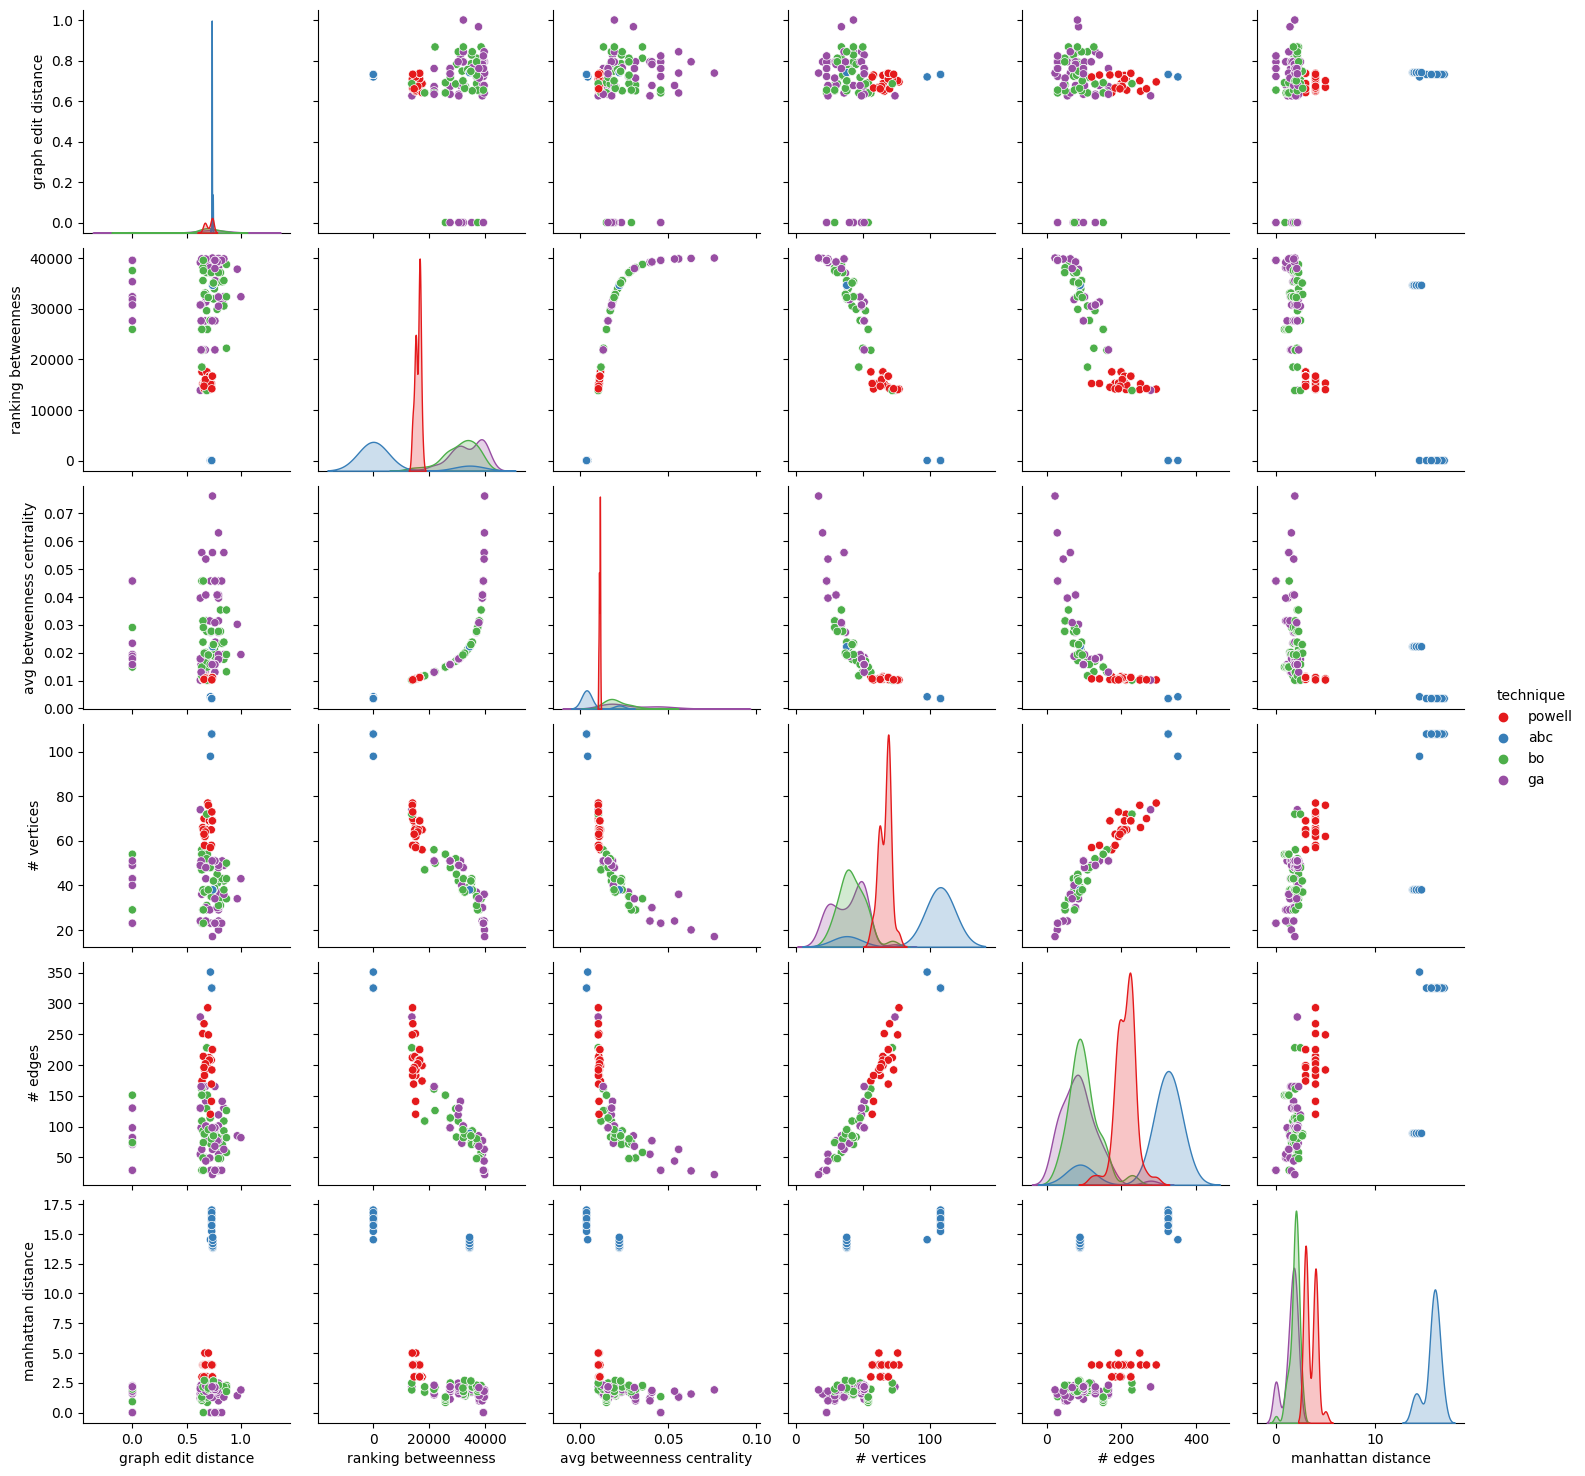

In [18]:
sns.pairplot(df_pairs, hue="technique", palette="Set1")
plt.savefig("./images/noise_pairplot", bbox_inches='tight')

C:\Users\IvS\anaconda3\envs\calibration_1_py9\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


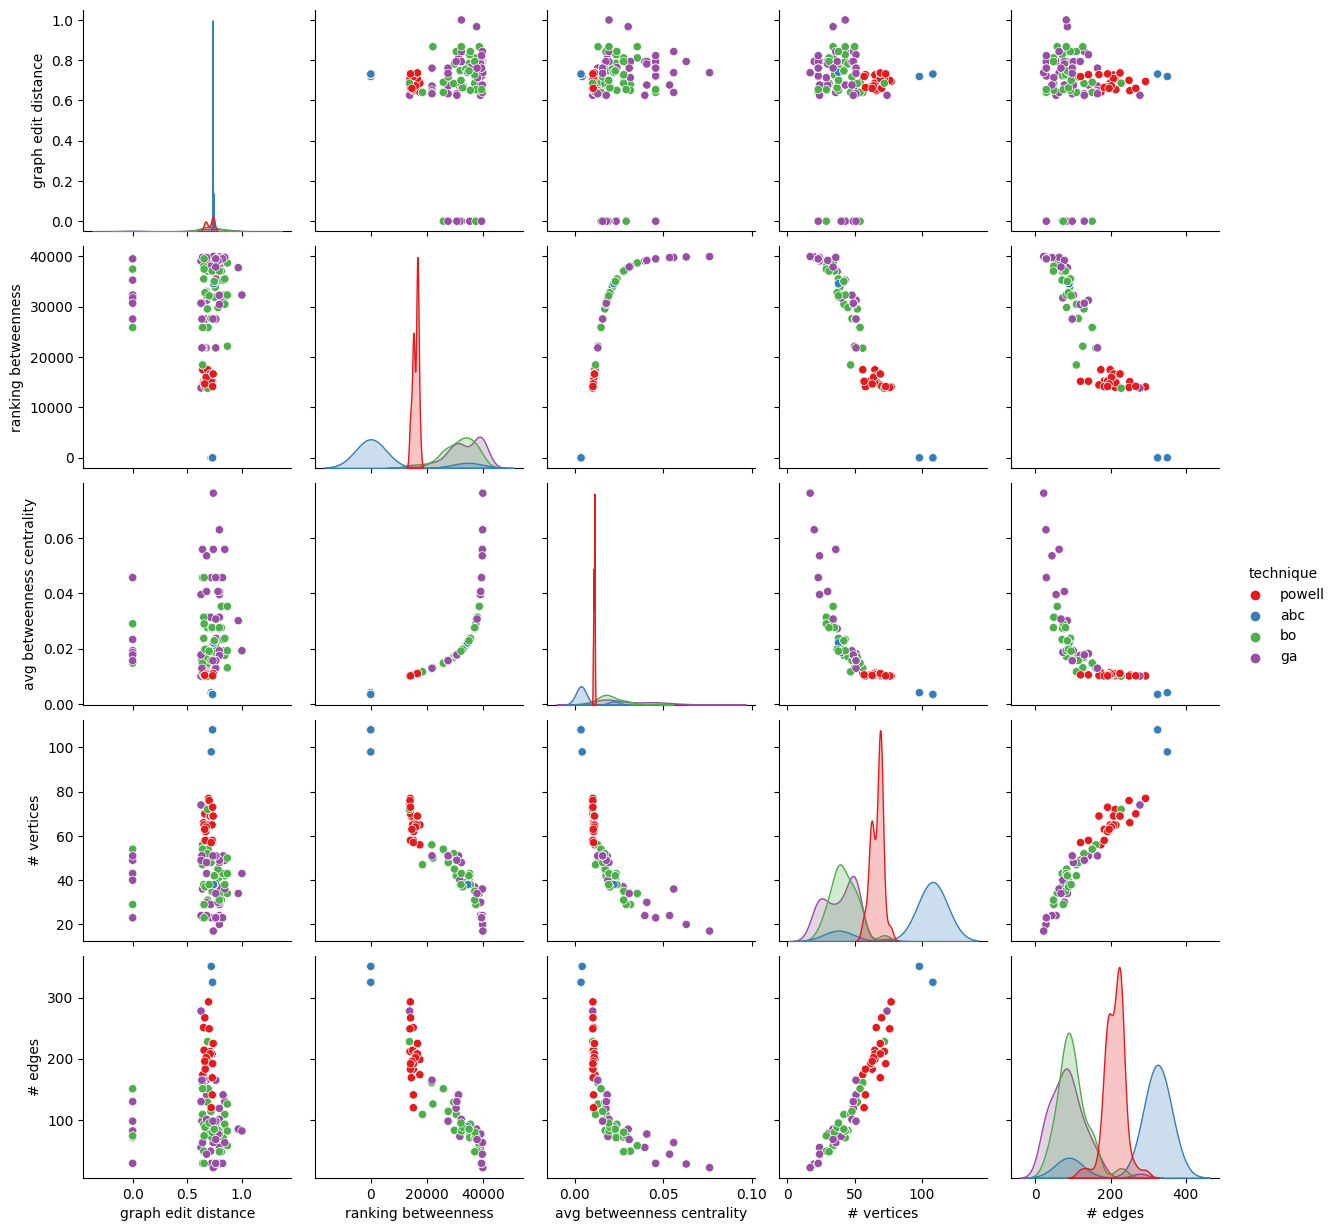

In [19]:
sns.pairplot(df_pairs.iloc[:,:-1], hue="technique", palette="Set1")
plt.savefig("./images/noise_pairplot_2", bbox_inches='tight')